In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
train_data = pd.read_csv("titanic_train.csv")
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [15]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### DATA CLEANING

In [18]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

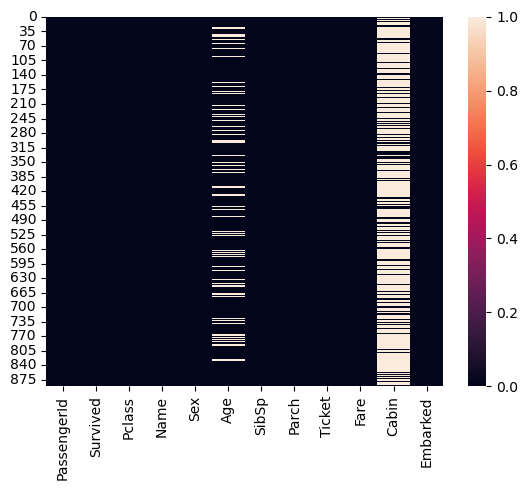

In [20]:
sns.heatmap(train_data.isna())
plt.show()

In [21]:
train_data = train_data.drop(columns = ["Cabin"], axis = 1)

In [22]:
train_data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [23]:
train_data["Embarked"] = train_data["Embarked"].fillna("S", inplace = False)

In [24]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [25]:
train_data["Sex"] = train_data["Sex"].map({"male": 0, "female": 1})
train_data["Embarked"] = train_data["Embarked"].map({"S": 0, "C": 1, "Q": 2})

In [26]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [27]:
train_data.duplicated().sum()

0

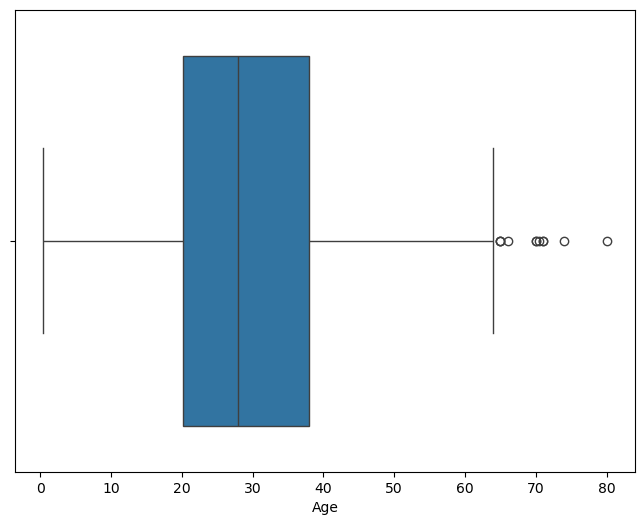

In [28]:
plt.figure(figsize = (8, 6))
sns.boxplot(train_data,x = "Age")
plt.show()

THE BOXPLOT SHOWS THAT THERE ARE NUMBERS OF OUTLIERS

In [29]:
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].median(), inplace = False)
num_feat = [feat for feat in train_data.columns if train_data[feat].dtypes == "float" or train_data[feat].dtypes == "int64"]
num_feat.remove("PassengerId")
num_feat

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

### EXPLORATORY DATA ANALYSIS

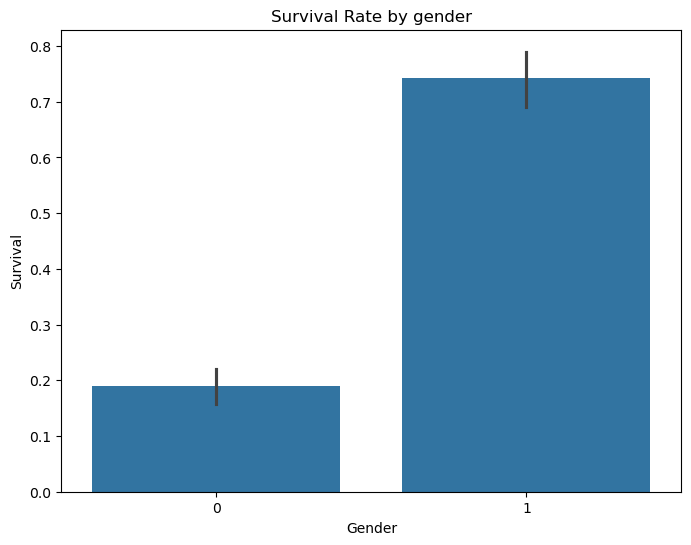

In [30]:
plt.figure(figsize = (8, 6))
sns.barplot(train_data, x = "Sex", y ="Survived")
plt.xlabel("Gender")
plt.ylabel("Survival")
plt.title("Survival Rate by gender")
plt.show()

#### THIS SHOWS THAT THE FEMALES HAVE HIGHER CHANCE OF SURVIVAL

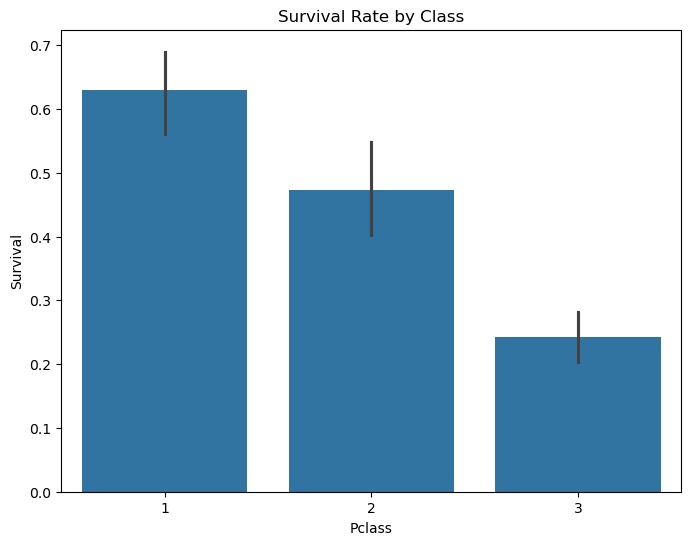

In [31]:
plt.figure(figsize = (8, 6))
sns.barplot(train_data, x = "Pclass", y ="Survived")
plt.xlabel("Pclass")
plt.ylabel("Survival")
plt.title("Survival Rate by Class")
plt.show()

##### THIS SHOWS THAT THE PASSENGERS THAT BELONG CLASS 1 HAVE HIGHEST CHANCE OD SURVIVAL AND THE PASSENGERS THAT BELONG CLASS 3 HAVE LEAST CHANCE Of SURVIVAL

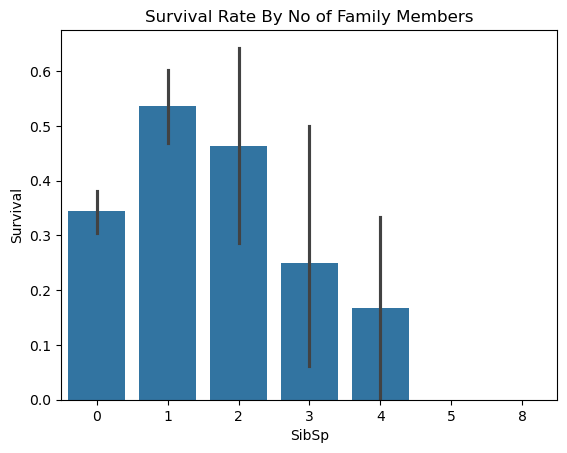

In [32]:
sns.barplot(train_data, x = "SibSp", y = "Survived")
plt.xlabel("SibSp")
plt.ylabel("Survival")
plt.title("Survival Rate By No of Family Members")
plt.show()

##### THIS SHOWS THAT HIGHER NUMBER OF FAMILY MEMBERS REDUCES THE CHANCE OF SURVIVAL

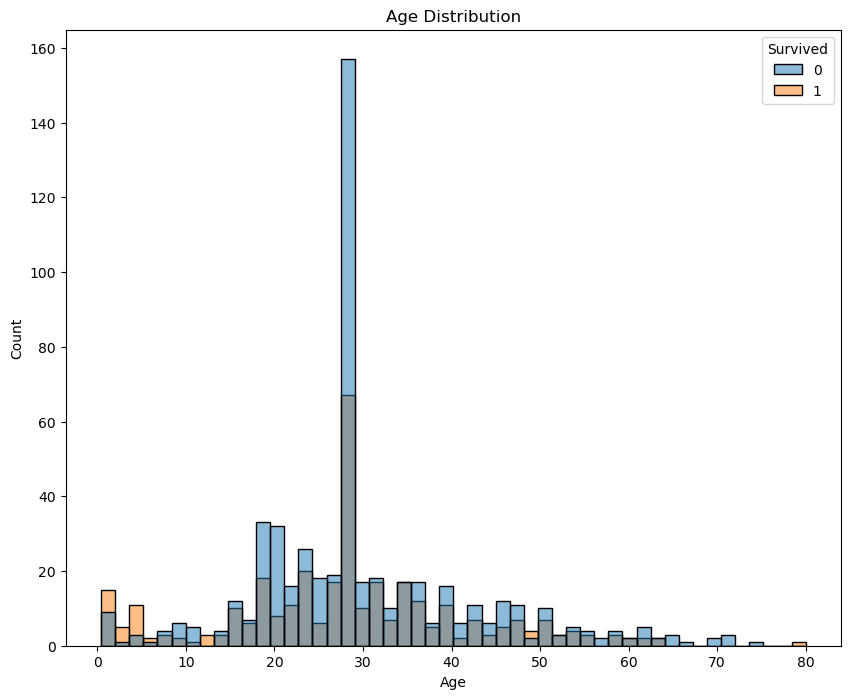

In [33]:
plt.figure(figsize = (10, 8))
sns.histplot(train_data, x = "Age", hue = "Survived", bins = 50)
plt.title("Age Distribution")
plt.show()

##### THIS SHOWS THAT THE AGE FEATURE IS NORMALLY DISTRIBUTED AND YOUNG CHILDREN ARE GIVEN PRIORITY DURING RESCUE

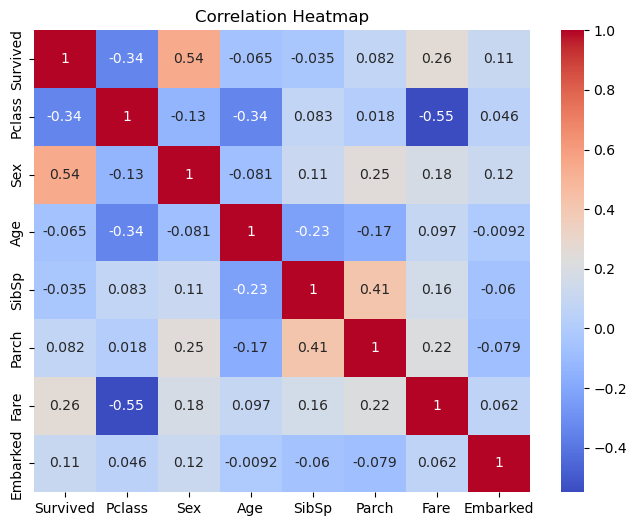

In [34]:
plt.figure(figsize = (8, 6))
sns.heatmap(train_data[num_feat].corr(), annot = True, cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

##### THIS SHOWS THERE IS NO COLINEARITY BETWEEN VARIABLES